In [1]:
import pandas as pd
import math
from matplotlib import pyplot as plt

In [2]:
max_epoch = 4000

val_data = pd.read_csv('./val_metrics.csv')
val_data = val_data.infer_objects()[val_data.epoch < max_epoch]
for col in val_data.columns:
    val_data[col] = pd.to_numeric(val_data[col])
# val_data.head()

In [3]:
train_data = pd.read_csv('./train_metrics.csv')
train_data = train_data.infer_objects()[train_data.epoch < max_epoch]
for col in train_data.columns:
    train_data[col] = pd.to_numeric(train_data[col])
# train_data.head()

In [4]:
plt.rcParams["figure.figsize"] = (16,6)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

epoch = train_data['epoch']
total_time = train_data['time'].sum()

time_h = math.floor(total_time / 3600)
time_m = math.floor((total_time - time_h*3600) / 60)
time_s = math.floor(total_time - time_h*3600 - time_m*60)


tf_emb_dim: 128
tf_ff_size: 128
pool_emb_dim: 32
bottleneck_dim: 8
mlp_dim: 64
noise_dim: 4
layer_count: 3
g_learning_rate: 0.00042146
d_learning_rate: 1.789e-05
heads: 1
sgan_d_emb_dim: 128
dropout: 0.0
g_param_count: 3786599
d_param_count: 140801
Total training time: 2h:16m:46s

Val mad min: 6.246
Val fad min: 13.972


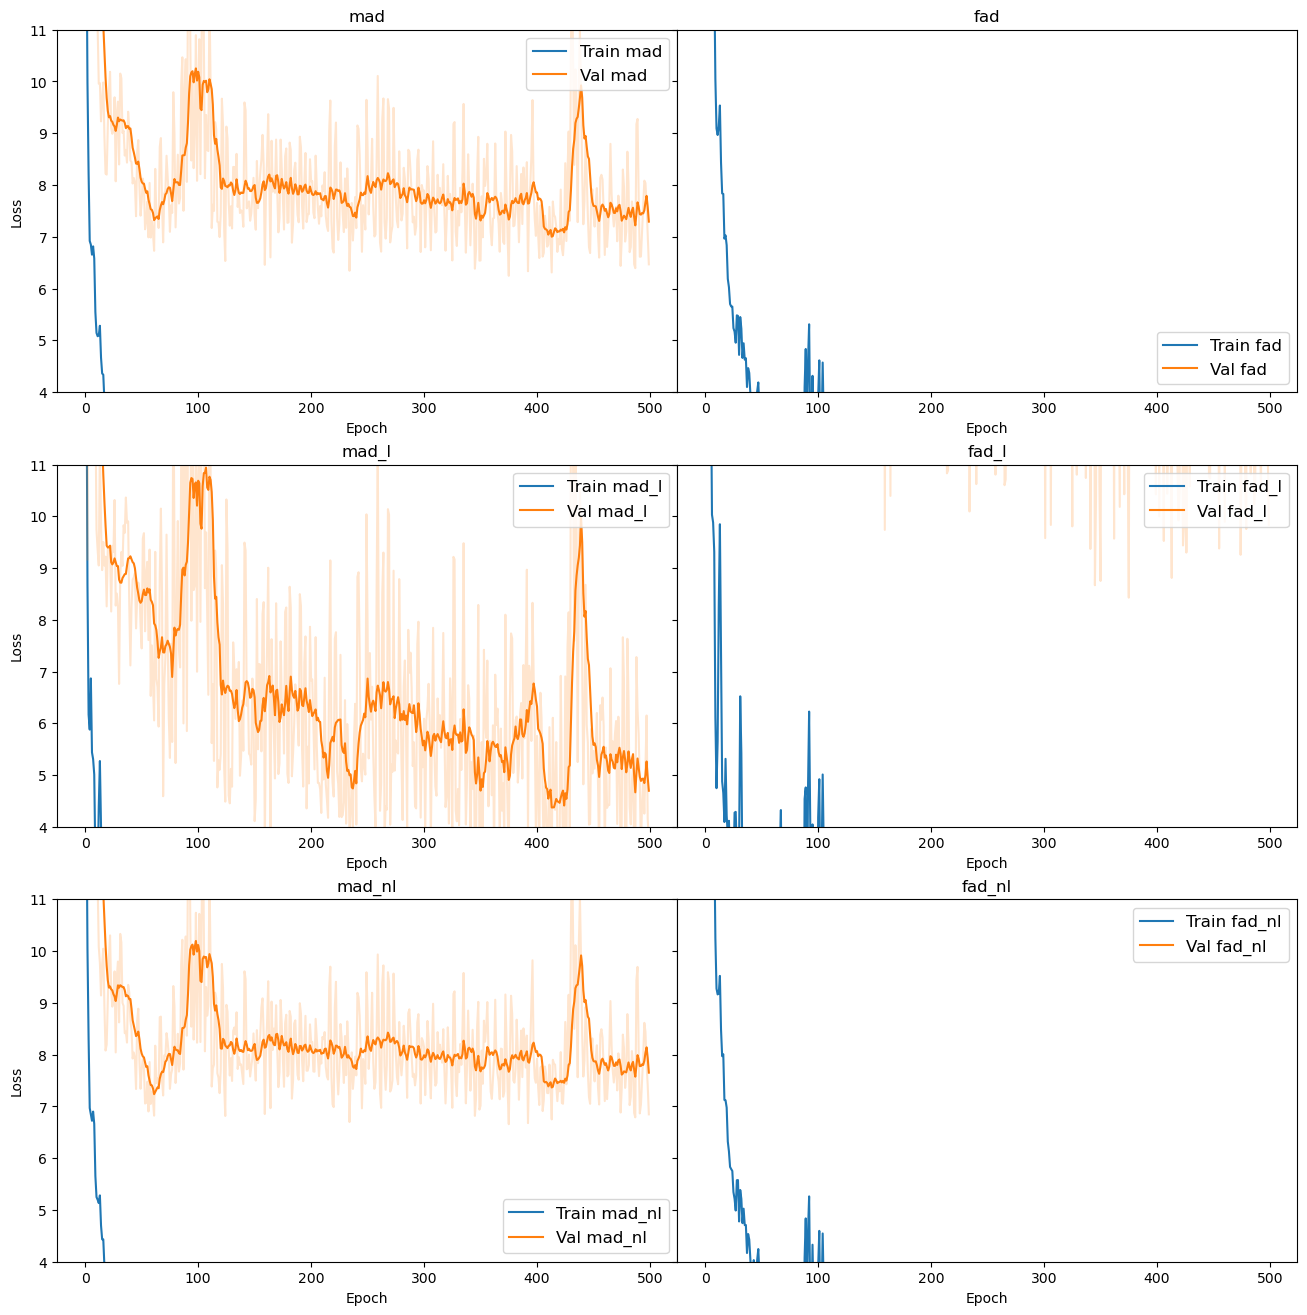

In [20]:
labels = []
rs = [1, 10]
alphas = [0.2, 1]

for col in train_data.columns:
    labels.append(col)

params = pd.read_csv('./h_params.csv')
for col in params.columns:
    params[col] = pd.to_numeric(params[col])
    print(f'{col}: {params[col][0]}')
    

print(f"Total training time: {time_h}h:{time_m}m:{time_s}s")

print()
print(f"Val mad min: {val_data['mad'].min():0.3f}")
print(f"Val fad min: {val_data['fad'].min():0.3f}")

fig = plt.figure(figsize=(16, 16))
gs = fig.add_gridspec(3, 2, wspace=0)
axs = gs.subplots(sharey=True).flatten().tolist()

for i, label in enumerate(labels[3:9]):
    axs[i].set_title(f"{label}")
    if i%2 == 0:
        axs[i].set_ylabel("Loss")
    axs[i].set_xlabel("Epoch")
    axs[i].set_ylim([4, 11])
    
    axs[i].plot(epoch, train_data[label].rolling(rs[0]).mean(), label=f"Train {label}", c=colors[0])
    for r, a in zip(rs, alphas):
        if a != 1:
            axs[i].plot(epoch, val_data[label].rolling(r).mean(), alpha=a, c=colors[1])
        else:
            axs[i].plot(epoch, val_data[label].rolling(r).mean(), label=f"Val {label}", alpha=a, c=colors[1])
    if i==1 or i == 4:
        axs[i].legend(loc='lower right', fontsize='large')
    else:
        axs[i].legend(loc='upper right', fontsize='large')
    
fig.savefig(f'pics/l_nl.png')
    
plt.show()


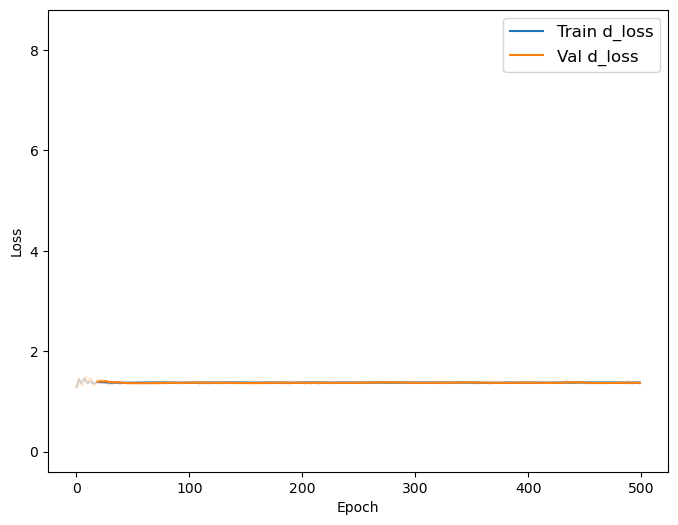

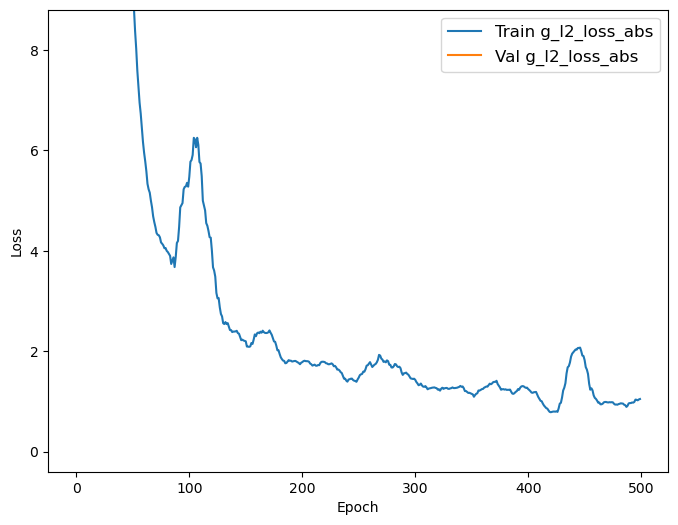

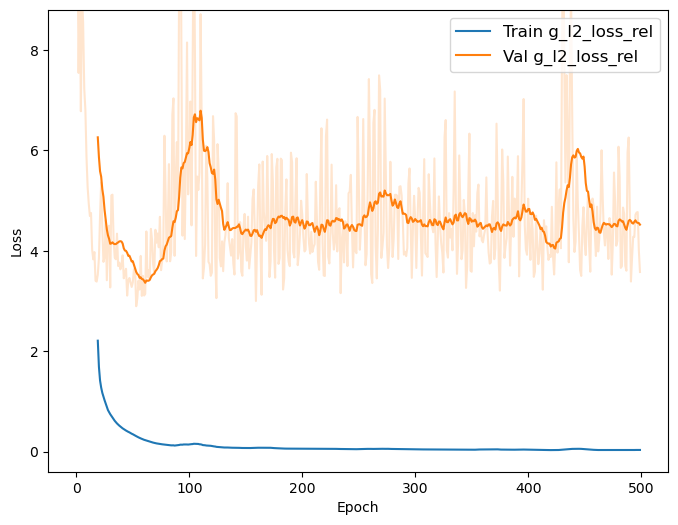

In [31]:
rs = [1, 20]

plt.rcParams["figure.figsize"] = (8,6)
for label in labels[:3]:
    plt.plot(epoch, train_data[label].rolling(r).mean(), label=f"Train {label}", c=colors[0])
    if label == 'd_loss':
        plt.plot(epoch, train_data[label].rolling(rs[0]).mean(), alpha=alphas[0], c=colors[0])
    for r, a in zip(rs, alphas):
        if a != 1:
            plt.plot(epoch, val_data[label].rolling(r).mean(), alpha=a, c=colors[1])
        else:
            plt.plot(epoch, val_data[label].rolling(r).mean(), label=f"Val {label}", alpha=a, c=colors[1])
    plt.ylim([-0.4, 8.8])
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(loc='upper right', fontsize='large')
    plt.savefig(f'pics/{label}_train.png')
    plt.show()
